In [1]:
import megatron as me
from scipy.sparse import load_npz
import time

In [2]:
me.__version__

'0.1a'

In [3]:
workdir = 'result_celltagging_clone_traj'
me.settings.set_workdir(workdir)

Saving results in: result_celltagging_clone_traj


In [4]:
me.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [5]:
adata = me.read_h5ad('rnaseq_biddy18.h5ad')
adata

AnnData object with n_obs × n_vars = 18076 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    obsm: 'X_tsne_paper'

In [6]:
mat_clone_traj = load_npz('clone_traj_biddy18.npz')
mat_clone_traj

<18076x1890 sparse matrix of type '<class 'numpy.int64'>'
	with 33901 stored elements in Compressed Sparse Row format>

In [7]:
me.pp.add_clone_traj(adata, 
                     mat=mat_clone_traj)
adata

AnnData object with n_obs × n_vars = 18076 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone_traj'
    obsm: 'X_tsne_paper', 'X_clone_traj'

In [8]:
me.pp.filter_clone_traj(adata,min_cells=1)
adata

Before filtering: 1890 clone trajectories
After filtering: 1890 clone trajectories


AnnData object with n_obs × n_vars = 18076 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone_traj'
    obsm: 'X_tsne_paper', 'X_clone_traj'

In [9]:
adata.obs['Cluster.Seurat'] = adata.obs['Cluster.Seurat'].astype(str)

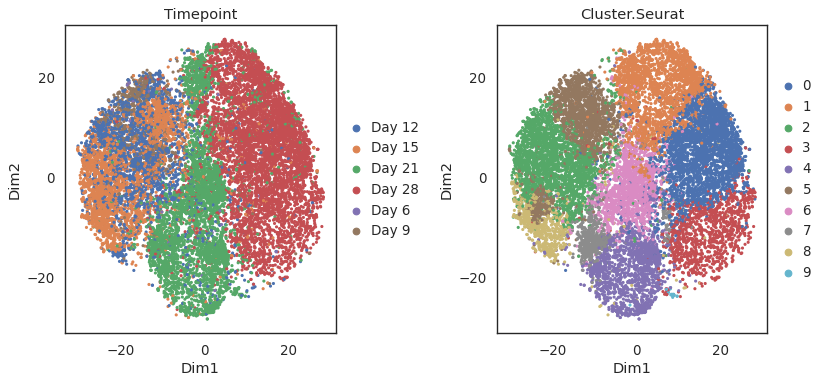

In [10]:
me.pl.scatter(adata, 
              color=['Timepoint','Cluster.Seurat'],
              drawing_order='random',
              obsm='X_tsne_paper')

In [12]:
st = time.time()
me.tl.clone_traj_distance(adata,
                         method='geodesic',
                         obsm='X_tsne_paper',
                         anno_time='Day',
                         n_jobs=20)
ed = time.time()

Finished: 6.245521716276804 mins


In [35]:
me.tl.cluster_clone_traj(adata,
                         n_clusters=6,
                         method='hierarchical')

In [36]:
adata.uns['clone_traj']['anno']

,hierarchical
0,1
1,1
2,6
3,1
4,1
...,...
1885,5
1886,5
1887,1
1888,2


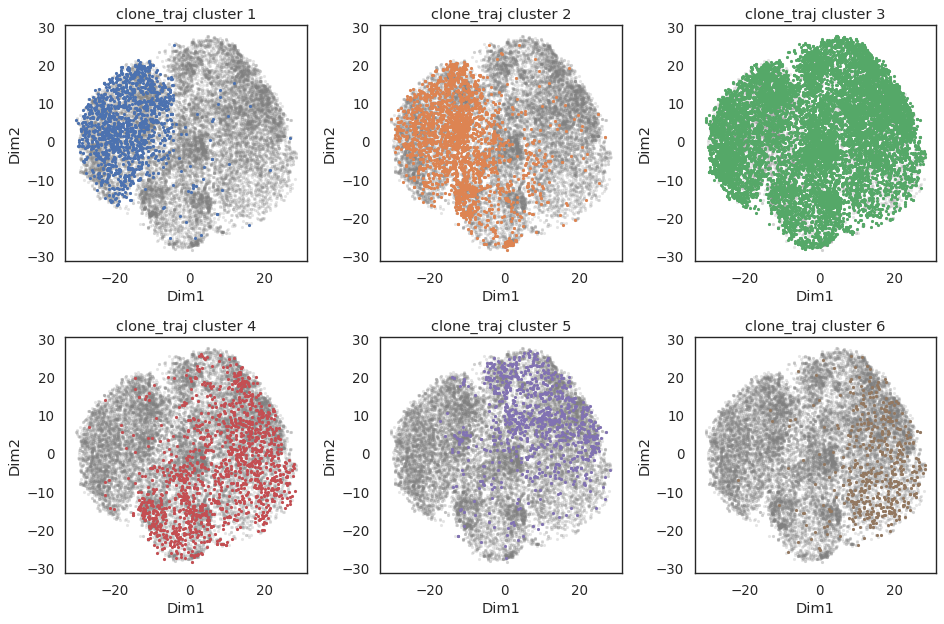

In [37]:
me.pl.clone_traj_scatter(adata, group='hierarchical', obsm='X_tsne_paper',
                         show_contour=False, 
                         levels=6, thresh=0.1,fig_ncol=3, alpha=1)

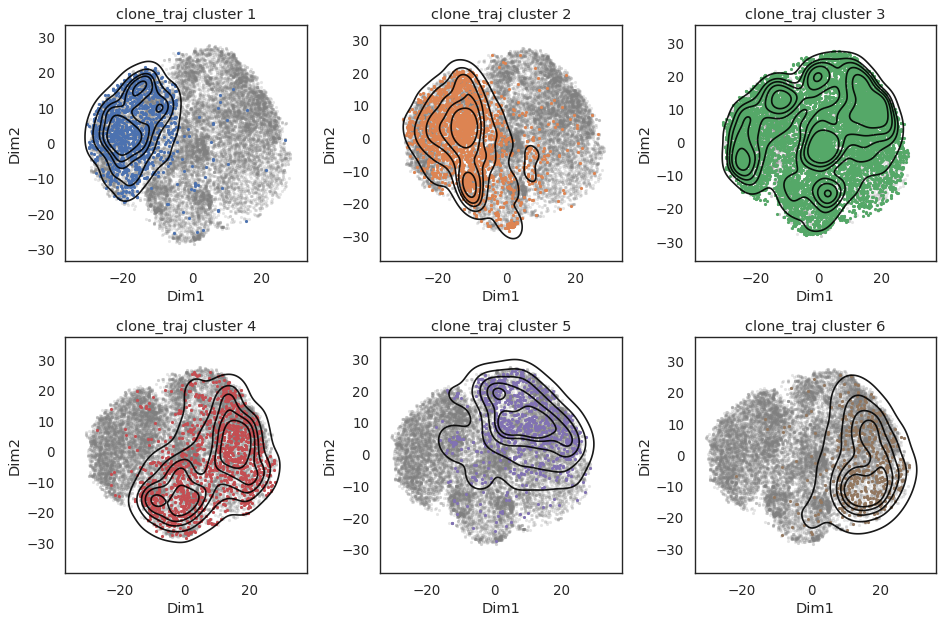

In [38]:
me.pl.clone_traj_scatter(adata, group='hierarchical', obsm='X_tsne_paper',show_contour=True, 
                        levels=6, thresh=0.1,fig_ncol=3, alpha=1)

In [45]:
adata.uns['clone_traj']['anno'].head()

,hierarchical
0,1
1,1
2,6
3,1
4,1


### analysis for cluster 3

In [76]:
import numpy as np

In [77]:
id_clones_x = adata.uns['clone_traj']['anno'][adata.uns['clone_traj']['anno']['hierarchical'] == '3'].index.astype(int)
len(id_clones_x)

510

In [78]:
id_cells_x = np.where(adata.obsm['X_clone_traj'][:, id_clones_x].sum(axis=1).A1>0)[0]
len(id_cells_x)

12346

In [79]:
adata_subset = adata[id_cells_x,].copy()
mat_clone_traj_subset = mat_clone_traj[id_cells_x,:][:,id_clones_x].copy()

In [80]:
me.pp.add_clone_traj(adata_subset, 
                     mat=mat_clone_traj_subset)
adata_subset

AnnData object with n_obs × n_vars = 12346 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone_traj', 'color'
    obsm: 'X_tsne_paper', 'X_clone_traj'

In [81]:
me.pp.filter_clone_traj(adata_subset,min_cells=1)
adata_subset

Before filtering: 510 clone trajectories
After filtering: 510 clone trajectories


AnnData object with n_obs × n_vars = 12346 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone_traj', 'color'
    obsm: 'X_tsne_paper', 'X_clone_traj'

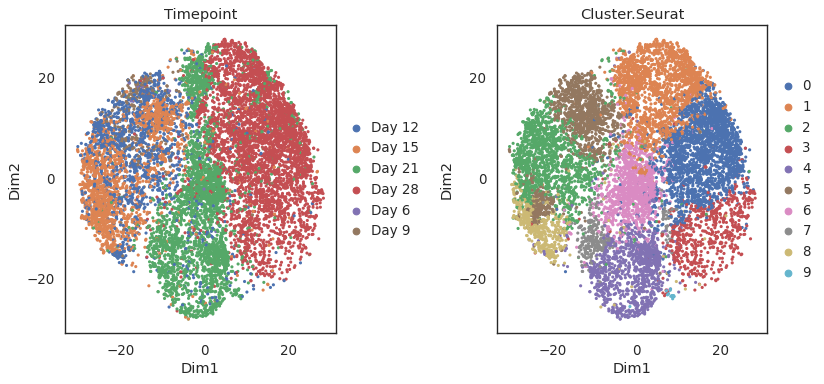

In [82]:
me.pl.scatter(adata_subset, 
              color=['Timepoint','Cluster.Seurat'],
              drawing_order='random',
              obsm='X_tsne_paper')

In [83]:
me.tl.clone_traj_distance(adata_subset,
                         method='geodesic',
                         obsm='X_tsne_paper',
                         anno_time='Day',
                         n_jobs=20)

Finished: 0.5826789180437724 mins


In [86]:
me.tl.cluster_clone_traj(adata_subset,
                         n_clusters=3,
                         method='hierarchical')

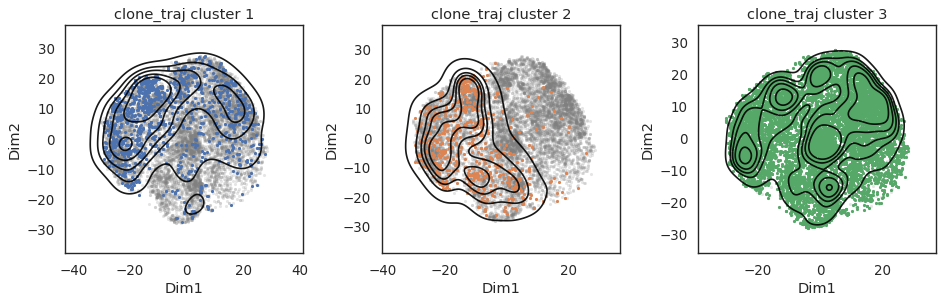

In [87]:
me.pl.clone_traj_scatter(adata_subset, group='hierarchical', obsm='X_tsne_paper',
                         show_contour=True, 
                         levels=6, thresh=0.1,fig_ncol=3, alpha=1)

In [88]:
adata.write('./result_celltagging_clone_traj/adata_celltag.h5ad')

/home/ec2-user/anaconda3/envs/env_megatron/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Cluster.Seurat' as categorical
